<a href="https://colab.research.google.com/github/hbeck118/GIS/blob/main/Berlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas==1.0.1

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
#!python --version
gpd.__version__

'1.0.1'

In [4]:
!pip install mapclassify
import mapclassify #need for thematic map classification

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 915.4 kB/s eta 0:00:00


In [8]:
#Shapefile of Berlin from https://hub.arcgis.com/datasets/esri-de-content::bezirke-berlin/about
! wget -q -O berlin.zip https://docs.google.com/uc?id=1N7YjXUVVv1-a5G69lQ4ioxMwcDvgCn3t&export=download

zip_ref = zipfile.ZipFile('berlin.zip', 'r'); zip_ref.extractall(); zip_ref.close()
ber0=gpd.read_file('Berlin_Bezirke.shp')

<Axes: >

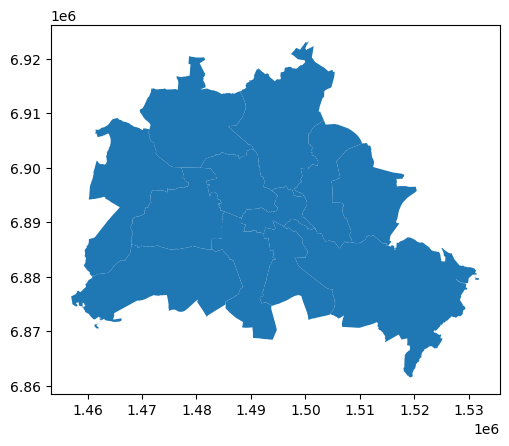

In [10]:
ber0.plot()

In [15]:
#importing data on foreign born population in Berlin from https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/
berfb=pd.read_excel('https://docs.google.com/uc?id=1UIpvSj5-CwQHJVkxhfSCEDBlJdvHPGw_&export=download')

In [16]:
#importing data on berlin total population from https://de.statista.com/statistik/daten/studie/1109841/umfrage/einwohnerzahl-bezirke-berlin/
berpop=pd.read_excel('https://docs.google.com/uc?id=1tlVbOworGPcjJCKMP7UK_3y9S_KKHRiX&export=download')

In [19]:
berfb.head(2)

,Bezirk,Ausländer
0,Mitte,148409
1,Neukölln,93045


In [17]:
berpop.head(2)

,Bezirk,Einwohnerzahl
0,Pankow,424307
1,Mitte,397134


In [18]:
merged_berpop = pd.merge(berfb, berpop, on='Bezirk')

In [20]:
merged_berpop.head(2)

,Bezirk,Ausländer,Einwohnerzahl
0,Mitte,148409,397134
1,Neukölln,93045,330017


In [22]:
merged_berpop['Ausländer'].astype(float)
merged_berpop['Einwohnerzahl'].astype(float)


,Ausländer
0,148409.0
1,93045.0
2,81506.0
3,92071.0
4,89525.0
5,66954.0
6,59817.0
7,55123.0
8,81457.0
9,75946.0


,Einwohnerzahl
0,397134.0
1,330017.0
2,355868.0
3,343081.0
4,293454.0
5,257091.0
6,268792.0
7,310446.0
8,424307.0
9,311881.0


In [23]:
merged_berpop['Percentage Foreign Born']=(merged_berpop['Ausländer'] / merged_berpop['Einwohnerzahl']) * 100

In [26]:
merged_berpop.head(2)

,Bezirk,Ausländer,Einwohnerzahl,Percentage Foreign Born
0,Mitte,148409,397134,37
1,Neukölln,93045,330017,28


In [25]:
merged_berpop['Percentage Foreign Born']=merged_berpop['Percentage Foreign Born'].astype(int)

In [28]:
ber0.columns

Index(['Gemeinde_n', 'Gemeinde_s', 'Land_name', 'Land_schlu', 'Schluessel',
       'geometry'],
      dtype='object')

In [29]:
ber0['Gemeinde_n']

,Gemeinde_n
0,Reinickendorf
1,Charlottenburg-Wilmersdorf
2,Treptow-Köpenick
3,Pankow
4,Neukölln
5,Lichtenberg
6,Marzahn-Hellersdorf
7,Spandau
8,Steglitz-Zehlendorf
9,Mitte


In [31]:
ber0.rename(columns={'Gemeinde_n': 'Bezirk'}, inplace=True)

In [32]:
ber0['Bezirk']

,Bezirk
0,Reinickendorf
1,Charlottenburg-Wilmersdorf
2,Treptow-Köpenick
3,Pankow
4,Neukölln
5,Lichtenberg
6,Marzahn-Hellersdorf
7,Spandau
8,Steglitz-Zehlendorf
9,Mitte


In [35]:
berfb_map = pd.merge(ber0, merged_berpop, on='Bezirk',how='outer',indicator=True)
berfb_map[['Bezirk','Percentage Foreign Born','_merge']]

berfb_map2 = pd.merge(ber0, merged_berpop, on='Bezirk',how='inner',indicator=False)

,Bezirk,Percentage Foreign Born,_merge
0,Charlottenburg-Wilmersdorf,26,both
1,Friedrichshain-Kreuzberg,30,both
2,Lichtenberg,24,both
3,Marzahn-Hellersdorf,18,both
4,Mitte,37,both
5,Neukölln,28,both
6,Pankow,19,both
7,Reinickendorf,22,both
8,Spandau,26,both
9,Steglitz-Zehlendorf,17,both


<Axes: >

[]

[]

Text(0.5, 274.24344253431104, 'https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/')

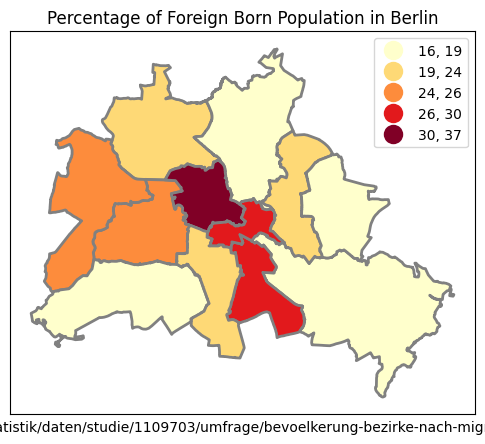

In [41]:
fig, ax = plt.subplots(1, figsize=(6,10))
berfb_map2.plot(ax=ax,column='Percentage Foreign Born',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Percentage of Foreign Born Population in Berlin")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/''')